# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
wind <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-10-27/wind-turbine.csv")
#wind |> head()
#nrow(wind)
spec(wind)

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  objectid = col_double(),
  province_territory = col_character(),
  project_name = col_character(),
  total_project_capacity_mw = col_double(),
  turbine_identifier = col_character(),
  turbine_number_in_project = col_character(),
  turbine_rated_capacity_k_w = col_double(),
  rotor_diameter_m = col_double(),
  hub_height_m = col_double(),
  manufacturer = col_character(),
  model = col_character(),
  commissioning_date = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  notes = col_character()
)

Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

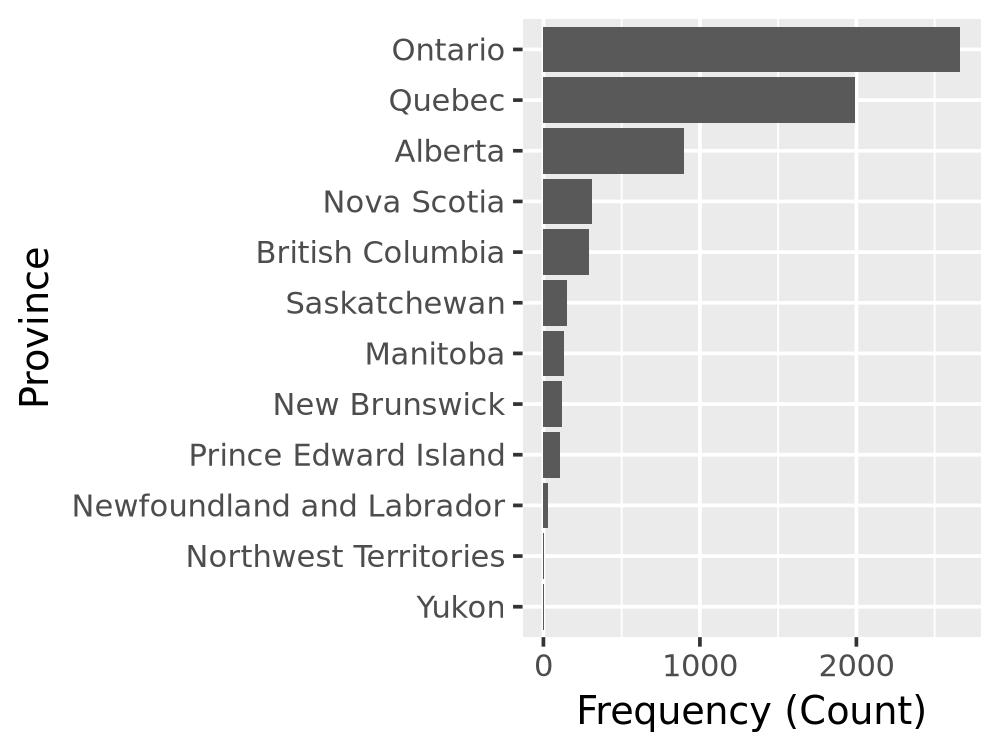

In [5]:
wind |> 
    mutate(province_fctr =fct_infreq(province_territory)|> 
        fct_rev())|>
    ggplot(aes(y=province_fctr)) + geom_bar() + labs(x="Frequency (Count)", y="Province")

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

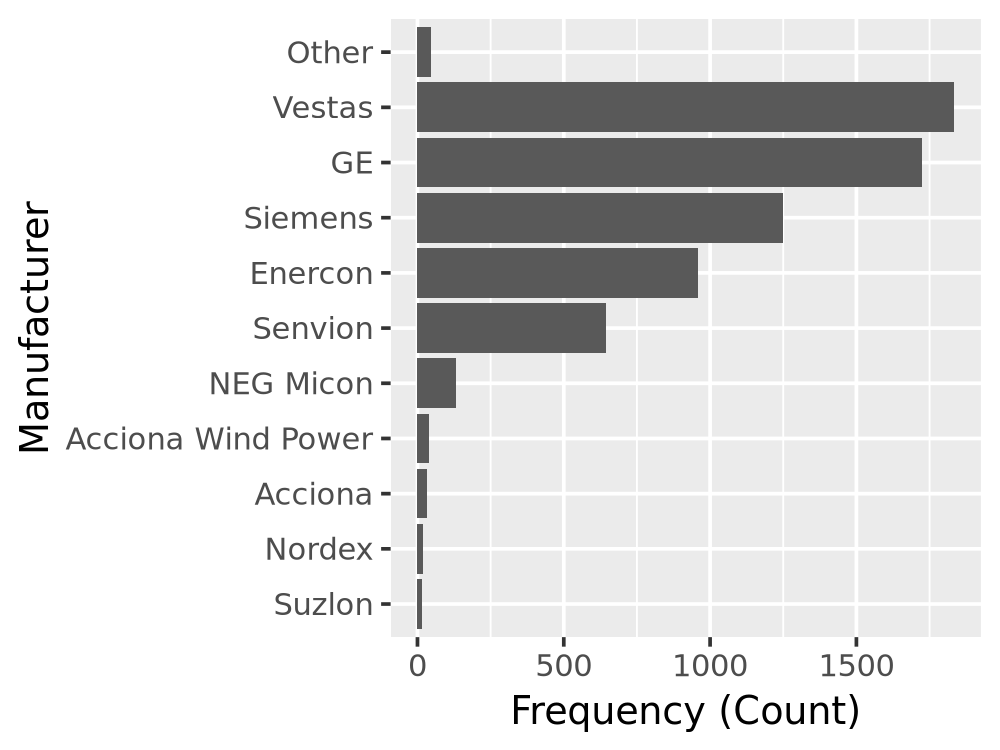

In [16]:
wind |> 
    mutate(manufacturer_fctr =fct_infreq(manufacturer)|> 
        fct_rev() |> fct_lump_min(15)) |> 
    ggplot(aes(y=manufacturer_fctr)) + geom_bar() + labs(x="Frequency (Count)", y="Manufacturer")

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [17]:
library("mapdata")

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




Now we can retrieve the "data" for a map of Canada. Run this code:

In [20]:
canada = map_data('world', region='Canada')  
canada |> head()

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-59.78760,43.93960,1,1,Canada,Sable Island
2,-59.92227,43.90391,1,2,Canada,Sable Island
3,-60.03775,43.90664,1,3,Canada,Sable Island
4,-60.11426,43.93911,1,4,Canada,Sable Island
5,-60.11748,43.95337,1,5,Canada,Sable Island
6,-59.93604,43.93960,1,6,Canada,Sable Island


Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?


No - in map data they have shorthand "long" and "lat" instead of spelling out like Turbine data does


The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

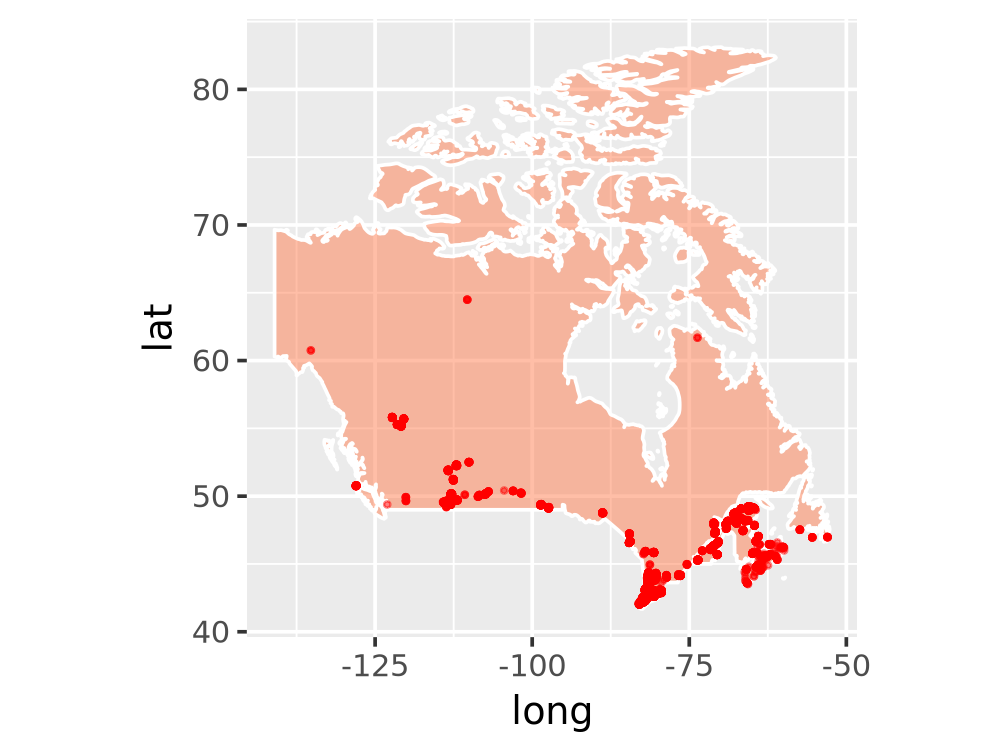

In [30]:
#override the data so we can include the locations 
# make sure encodings work with your new layer 
ggplot(data = canada) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    coord_quickmap() + 
    geom_point(data=wind, color = "red", mapping=aes(x=longitude, y=latitude), alpha=0.5, size=0.5)